<a href="https://colab.research.google.com/github/ShrayasiChakraborty-77/Weather_Analysis_Pune/blob/main/WeatherAnalysisInPune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Data Analysis For Pune

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from datetime import datetime

sns.set(style="whitegrid")

Load The Data

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the CSV file here

df = pd.read_csv("/content/sample_data/pune.csv")
df.head()

Saving pune.csv to pune.csv


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-12-11 00:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,10,31,72,0.0,1013,18,10,114,5,pune
1,2008-12-11 01:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,9,30,72,0.0,1013,19,10,125,4,pune
2,2008-12-11 02:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,136,4,pune
3,2008-12-11 03:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,147,4,pune
4,2008-12-11 04:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,7,23,68,0.0,1014,20,10,136,4,pune


Preprocessing


In [ ]:
df = df.rename(columns={'date_time': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


Rename columns for consistency


In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


Fill missing values with interpolation

In [ ]:
df.interpolate(method='linear', inplace=True)


<ipython-input-30-a83f336b1194>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


Remove outliers using IQR

In [ ]:
for col in ['temperature', 'humidity', 'precipitation']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


Feature engineering

In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day


Monthly average temperature trend

<Figure size 1200x600 with 0 Axes>

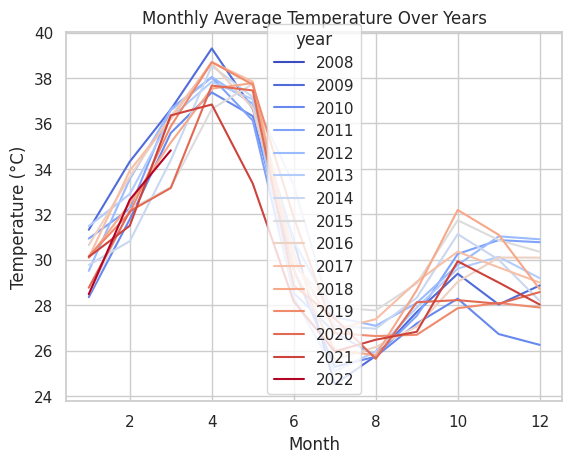

In [ ]:
plt.figure(figsize=(12, 6))
# Access the temperature column using its modified name, e.g., 'maxtempc' or the lowercase version of the actual name.
monthly_avg = df.groupby(['year', 'month'])['maxtempc'].mean().unstack()
monthly_avg.T.plot(title='Monthly Average Temperature Over Years', cmap="coolwarm")
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.show()

Violin plot of daily temp variations

<ipython-input-34-a6407d312e1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='tempc', data=df, palette='Spectral')  # Replace 'tempc' with the actual name if different


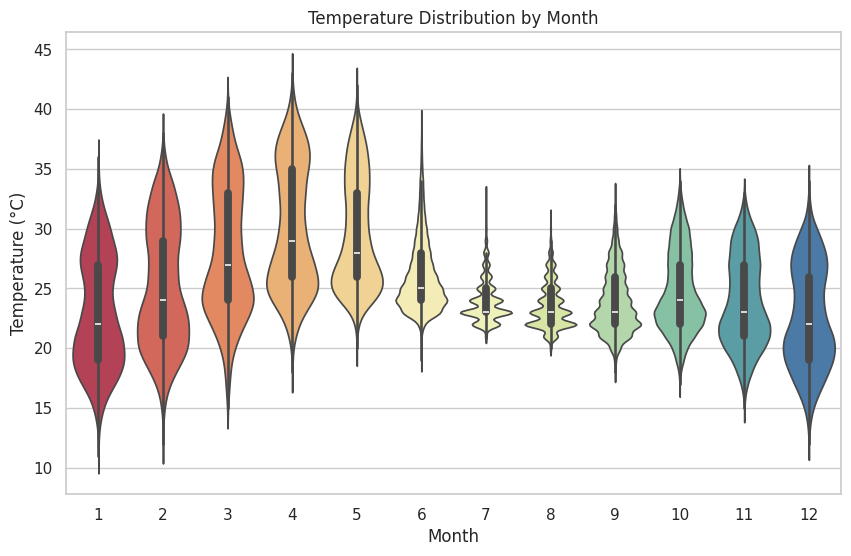

In [ ]:
plt.figure(figsize=(10,6))
# Assuming the 'temperature' column was renamed to 'tempc' or similar during preprocessing:
sns.violinplot(x='month', y='tempc', data=df, palette='Spectral')  # Replace 'tempc' with the actual name if different
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

Seasonal Grouping

<ipython-input-35-8257bab6202f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='tempc', data=df, palette='coolwarm')  # Replace with the correct column name


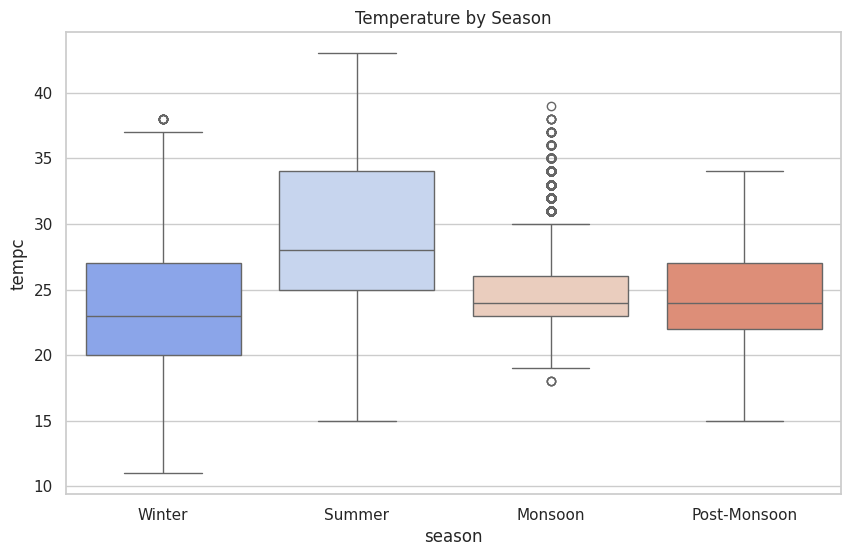

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)
plt.figure(figsize=(10,6))
# Replace 'tempc' or 'temperature' with the correct column name if it was changed during preprocessing:
sns.boxplot(x='season', y='tempc', data=df, palette='coolwarm')  # Replace with the correct column name
plt.title('Temperature by Season')
plt.show()


Correlation Heatmap

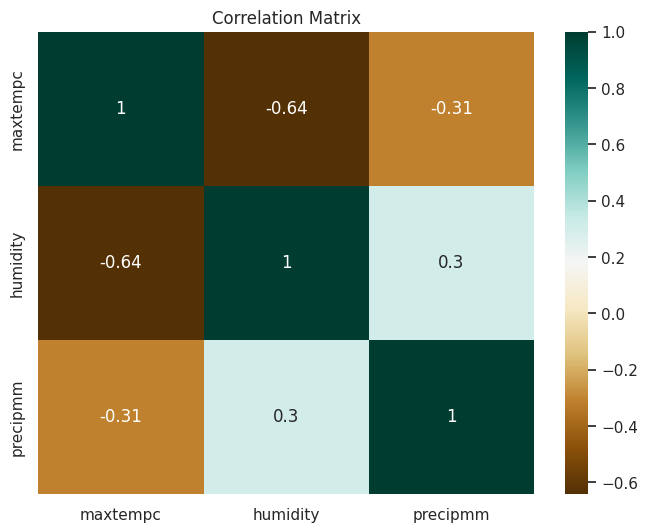

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['maxtempc', 'humidity', 'precipmm']].corr(), annot=True, cmap='BrBG')
plt.title('Correlation Matrix')
plt.show()

Time series trend and decomposition

In [ ]:
df = df.set_index('date').sort_index()
if 'temperature' in df.columns:
    stl = STL(df['temperature'].dropna(), period=365)
    result = stl.fit()
    result.plot()
    plt.suptitle('STL Decomposition - Temperature', fontsize=16)
    plt.show()

Rolling Averages


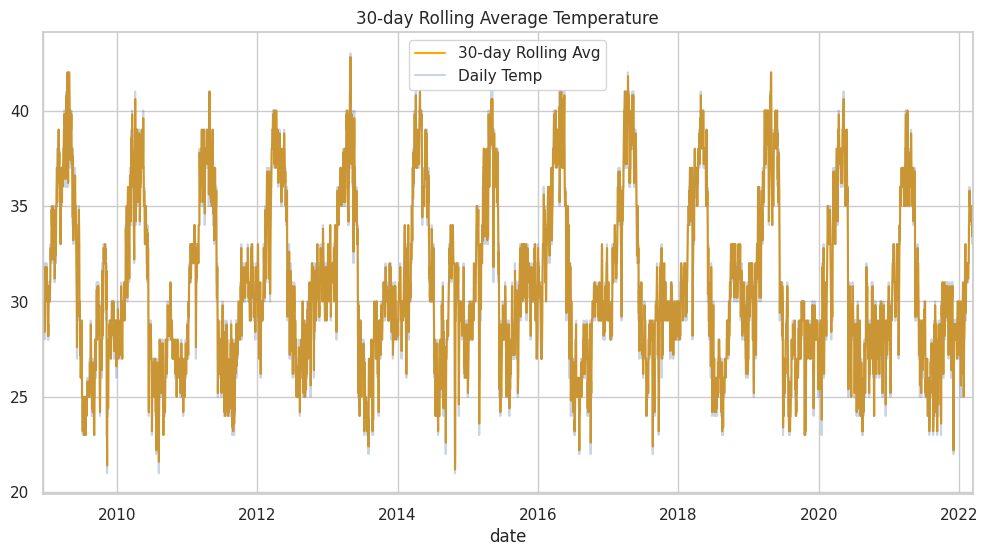

In [ ]:
plt.figure(figsize=(12,6))
# Assuming the 'temperature' column was renamed to 'maxtempc' during preprocessing:
df['maxtempc'].rolling(window=30).mean().plot(label='30-day Rolling Avg', color='orange')
df['maxtempc'].plot(alpha=0.3, label='Daily Temp') # Replace 'temperature' with 'maxtempc'
plt.legend()
plt.title('30-day Rolling Average Temperature')
plt.show()